# Feed-Forward Neural Network

In [15]:
import torch
import numpy as np
from torch import nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

## Import data

In [16]:
train_dataset = torchvision.datasets.MNIST(root='../data/', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='../data/', train=False, transform=transforms.ToTensor())

In [17]:
config = {
    'device': torch.device('cuda'),
    'batch_size': 100,
    'input_size': train_dataset.data[0].size()[0] ** 2,
    'hidden_size': 50,
    'num_classes': 10,
    'learning_rate': 0.001,
    'num_epochs': 25
}

In [18]:
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'])

## NeuralNet

In [19]:
class NeuralNet(nn.Module):
    def __init__(self, in_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(in_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = NeuralNet(config['input_size'], config['hidden_size'], config['num_classes']).to(config['device'])
crit = nn.CrossEntropyLoss().to(config['device'])
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])

In [20]:
history_epoch_loss = np.empty(config['num_epochs'])
history_epoch_acc = np.empty(config['num_epochs'])
for epoch in range(config['num_epochs']):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(config['device'])
        labels = labels.to(config['device'])
        images = images.view(-1, config['input_size'])

        out = model(images)
        loss = crit(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    with torch.no_grad():
        n_correct_pred = 0
        for images, labels in test_loader:
            images = images.to(config['device'])
            labels = labels.to(config['device'])
            images = images.view(-1, config['input_size'])
            out = model(images)
            _, y_pred = torch.max(out, 1)
            n_correct_pred += torch.sum(y_pred == labels)
        accuracy = n_correct_pred/len(test_loader.dataset)

    print(f'epoch {epoch+1} / {config["num_epochs"]},', end=' ')
    print(f'step {i+1}/{len(train_loader)}, loss {loss.item():.4f},', end=' ')
    print(f'test accuracy {accuracy:.2%}')

    history_epoch_loss[epoch] = loss.item()
    history_epoch_acc[epoch] = accuracy

epoch 1 / 25, step 600/600, loss 0.2870, test accuracy 92.75%
epoch 2 / 25, step 600/600, loss 0.2006, test accuracy 94.56%
epoch 3 / 25, step 600/600, loss 0.0668, test accuracy 95.68%
epoch 4 / 25, step 600/600, loss 0.0995, test accuracy 96.10%
epoch 5 / 25, step 600/600, loss 0.1230, test accuracy 96.76%
epoch 6 / 25, step 600/600, loss 0.1439, test accuracy 96.92%
epoch 7 / 25, step 600/600, loss 0.1001, test accuracy 97.03%
epoch 8 / 25, step 600/600, loss 0.1055, test accuracy 97.19%
epoch 9 / 25, step 600/600, loss 0.0685, test accuracy 97.31%
epoch 10 / 25, step 600/600, loss 0.0351, test accuracy 97.21%
epoch 11 / 25, step 600/600, loss 0.0179, test accuracy 97.55%
epoch 12 / 25, step 600/600, loss 0.0842, test accuracy 97.41%
epoch 13 / 25, step 600/600, loss 0.0351, test accuracy 97.23%
epoch 14 / 25, step 600/600, loss 0.0387, test accuracy 97.30%
epoch 15 / 25, step 600/600, loss 0.0085, test accuracy 97.13%
epoch 16 / 25, step 600/600, loss 0.0460, test accuracy 97.27%
e

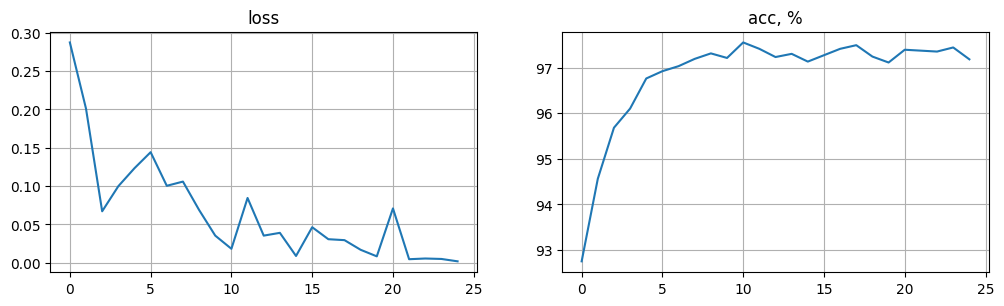

In [21]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
plt.tight_layout()
plt.title('loss')
plt.plot(range(config['num_epochs']), history_epoch_loss, )
plt.grid()
plt.subplot(1, 2, 2)
plt.title('acc, %')
plt.plot(range(config['num_epochs']), history_epoch_acc * 100)
plt.subplots_adjust(wspace=0.2)
plt.grid()